In [2]:
#Step 1: Displaying of Titanic Dataset
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
d=pd.read_csv('titanic_task1.csv')
d

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<Axes: xlabel='SibSp', ylabel='count'>

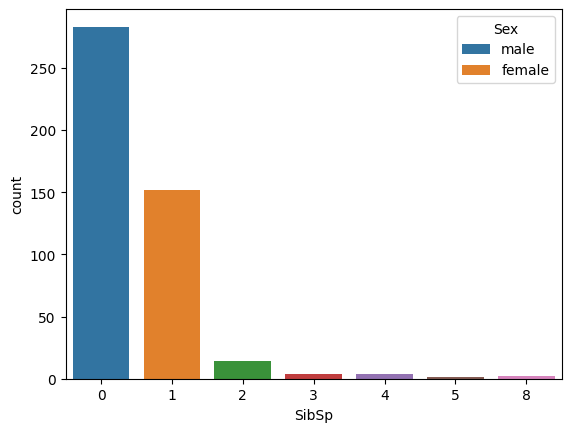

In [6]:
#Step 2: Data Analysis
sns.countplot(x='SibSp',data=d)

<Axes: xlabel='Survived', ylabel='count'>

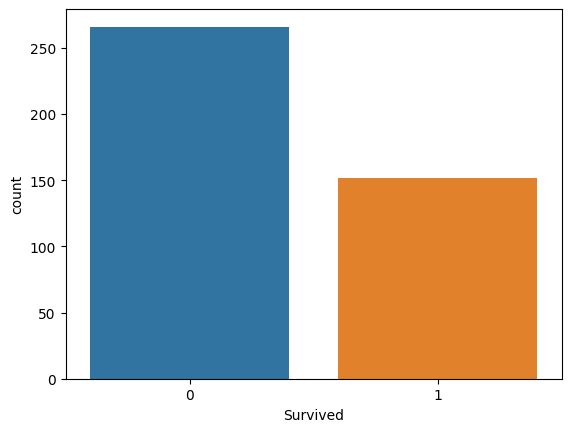

In [7]:
sns.countplot(x='Survived',data=d)

<Axes: xlabel='Survived', ylabel='count'>

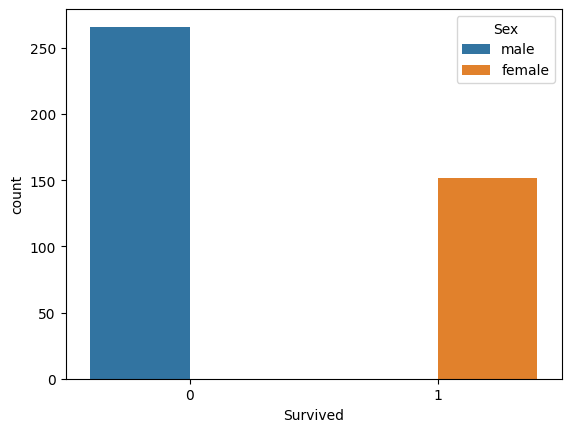

In [8]:
sns.countplot(x='Survived',data=d,hue='Sex')

In [9]:
#Step 3: Data Wrangling
d=d.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1) #Removing unecessary data columns

In [10]:
d['Sex']=d['Sex'].map({'female':1,'male':0}) #For easy analysis '1' denotes female and '0' denotes male
d['Age'].fillna(d['Age'].median(),inplace=True)#Placing average value in null field
d['Fare'].fillna(d['Fare'].median(),inplace=True)#Placing average value in null field
d

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,34.5,0,0,7.8292
1,1,3,1,47.0,1,0,7.0000
2,0,2,0,62.0,0,0,9.6875
3,0,3,0,27.0,0,0,8.6625
4,1,3,1,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,0,3,0,27.0,0,0,8.0500
414,1,1,1,39.0,0,0,108.9000
415,0,3,0,38.5,0,0,7.2500
416,0,3,0,27.0,0,0,8.0500


In [11]:
#Step 4: Train The Data
x=d.drop('Survived',axis=1)
y=d['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
#Step 5:Perform Logistic Regression
model=LogisticRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
acc=accuracy_score(y_test,prediction)
clas=classification_report(y_test,prediction)
acc,clas#Accuracy score and Classification report is 1.0 that means prediction is 100 percent

(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        51\n           1       1.00      1.00      1.00        33\n\n    accuracy                           1.00        84\n   macro avg       1.00      1.00      1.00        84\nweighted avg       1.00      1.00      1.00        84\n')

In [14]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,prediction))
rmse#Since the output is 0.0, the prediction is 100%

0.0